# **Web Scraping Traveloka**

### **Import Libraries**



In [40]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
from bs4 import BeautifulSoup
import requests

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **No 1**



In [41]:
url_target = "https://www.traveloka.com/id-id/accommodation/apartment/indonesia"
respon = requests.get(url_target)
soup = BeautifulSoup(respon.text, "html.parser")
kotak_all = soup.find_all("div", class_= "css-1dbjc4n r-14lw9ot r-awg2lu r-1dzdj1l r-rs99b7 r-18u37iz r-1jbys1g r-1udh08x")

**Pada Point 1 / Nomor satu , saya mengambil atau web scraping pada halaman Traveloka tentang akomodasi Apartemen yang populer di Indonesia**

Saya memilih **akomodasi** dari halaman Traveloka karena data ini sangat penting dalam aplikasi dunia nyata, khususnya dalam sektor pariwisata. Data yang akan dikumpulkan meliputi:

1. **Nama Akomodasi**
2. **Lokasi**
3. **Rating**
4. **Jumlah Ulasan**

### Penggunaan Data:
- **Sistem Rekomendasi**: Memberikan saran akomodasi terbaik kepada pengguna berdasarkan rating dan harga.
- **Analisis Tren Pariwisata**: Mengidentifikasi destinasi populer dan preferensi wisatawan.

### Mengapa Disimpan di PostgreSQL:
- **Terstruktur**: Data relasional seperti harga, lokasi, dan rating bisa dikelola dengan mudah.
- **Query Cepat**: PostgreSQL memungkinkan pencarian dan analisis data dengan cepat.

Data ini sangat berguna untuk membantu perusahaan memahami kebutuhan pengguna, mengoptimalkan operasional, dan meningkatkan kepuasan pelanggan.

## **No 2**



In [42]:
#ngambil nama hotel
#membuat variable untuk menampung nama hotel

nama_hotel = []
for nama in kotak_all:
    hotel = nama.find("a", attrs = {"class":"css-4rbku5 r-6koalj r-eqz5dr"}).text
    print(hotel)

#cari rating
rate = []
for rating in kotak_all:
    rating1 = rating.find("div", attrs = {"data-testid":"popular-hotel-rating"}).text
    print(rating1)

#Jumlah Review
jum_review = []
for jumlah in kotak_all:
    count = jumlah.find("div",attrs = {"class":"css-901oao r-a5wbuh r-1b43r93 r-1kfrs79 r-rjixqe r-fdjqy7"}).text
    print(count)

#kategori
kategori = []
for category in kotak_all:
    kateg = category.find("div", attrs = {"data-testid":"popular-hotel-rating-info"}).text
    print(kateg)

#tipe destination
type = []
for tipe in kotak_all:
    type1 = tipe.find("div", attrs = {"data-testid":"popular-hotel-accommodation-type"}).text
    print(type1)

Ascott Jakarta 
Somerset Sudirman Jakarta
Ascott Sudirman Jakarta
Herloom Serviced Residence BSD
Ra Suites Simatupang
Ascott Kuningan Jakarta
Oakwood Apartments PIK Jakarta (Pantai Indah Kapuk)
The Reiz Suites, ARTOTEL Curated
Citadines Sudirman Jakarta
SKYLAND CITY HOTEL JATINANGOR 
Ra Premiere Simatupang
The Ritz-Carlton Jakarta, Pacific Place Residences
Somerset Berlian Jakarta
Simpang Lima Residence
The Rooms Apartment Bali by ARM Hospitality
The Malibu Suites Balikpapan by Sissae Living
Oakwood Premier Cozmo Jakarta
Somerset Grand Citra
Ascott Waterplace Surabaya
Midtown Residence Simatupang Jakarta 
 8.7 
 9 
 8.6 
 9 
 8.9 
 8.7 
 8.2 
 8.9 
 9.1 
 8.5 
 8.6 
 8.7 
 8.7 
 8.3 
 8.4 
 8 
 8.8 
 8.4 
 8.8 
 8.3 
(3.808) 
(767) 
(2.387) 
(252) 
(426) 
(1.580) 
(861) 
(512) 
(281) 
(343) 
(2.838) 
(317) 
(2.275) 
(5.145) 
(1.657) 
(2.681) 
(664) 
(1.860) 
(2.262) 
(2.136) 
Mengesankan
Mengesankan
Mengesankan
Mengesankan
Mengesankan
Mengesankan
Nyaman
Mengesankan
Luar Biasa
Mengesank

## **No 3**



Cleaning dan Fix data untuk dijadikan Data Frame

Karena Data yang diambil sudah lumayan bersih maka tidak ada cleaning data yang lebih detail, hanya saja pada bagian **no 3** ini dilakukan append untuk mengisi variable data yang dibuat dengan data yang sudah di scraping pada nomor 2

In [43]:
#ngambil nama hotel
#membuat variable untuk menampung nama hotel

nama_hotel = []
for nama in kotak_all:
    try: #Menggunakan try untuk menambahkan data yang telah diambil ke dalam variable nama hotel
        hotel = nama.find("a", attrs = {"class":"css-4rbku5 r-6koalj r-eqz5dr"}).text
        nama_hotel.append(hotel)
    except:
        nama_hotel.append("")

#cari rating
rate = []
for rating in kotak_all:
    try: #Menggunakan try untuk menambahkan data yang telah diambil ke dalam variable nama hotel
        rating1 = rating.find("div", attrs = {"data-testid":"popular-hotel-rating"}).text
        rate.append(rating1)
    except:
        rate.append("")

#Jumlah Review
jum_review = []
for jumlah in kotak_all:
    try: #Menggunakan try untuk menambahkan data yang telah diambil ke dalam variable nama hotel
        count = jumlah.find("div",attrs = {"class":"css-901oao r-a5wbuh r-1b43r93 r-1kfrs79 r-rjixqe r-fdjqy7"}).text
        jum_review.append(count)
    except:
        jum_review.append("")

#kategori
kategori = []
for category in kotak_all:
    try : #Menggunakan try untuk menambahkan data yang telah diambil ke dalam variable nama hotel
        kateg = category.find("div", attrs = {"data-testid":"popular-hotel-rating-info"}).text
        kategori.append(kateg)
    except :
        kategori.append("")

#tipe destination
type = []
for tipe in kotak_all:
    try: #Menggunakan try untuk menambahkan data yang telah diambil ke dalam variable nama hotel
        type1 = tipe.find("div", attrs = {"data-testid":"popular-hotel-accommodation-type"}).text
        type.append(type1)
    except:
        type.append("")

In [44]:
#cek panjang data
if len(nama_hotel) == len(rate) == len(jum_review) == len(kategori) == len(type):
    print("Data aman")
else:
    print("Data tidak aman")

print(f"Nama Apartemen: {len(nama_hotel)}")
print(f"rating: {len(rate)}")
print(f"Jumlah Review: {len(jum_review)}")
print(f"Kategori: {len(kategori)}")
print(f"Tipe Destination: {len(type)}")

Data aman
Nama Apartemen: 20
rating: 20
Jumlah Review: 20
Kategori: 20
Tipe Destination: 20


In [45]:
import pandas as pd
a = pd.DataFrame({
    "Nama":nama_hotel,
    "Tipe Destination":type,
    "Rating":rate,
    "Jumlah_Review":jum_review,
    "Kategori":kategori
})
a


,Nama,Tipe Destination,Rating,Jumlah_Review,Kategori
0,Ascott Jakarta,Apartemen,8.7,(3.808),Mengesankan
1,Somerset Sudirman Jakarta,Apartemen,9,(767),Mengesankan
2,Ascott Sudirman Jakarta,Apartemen,8.6,(2.387),Mengesankan
3,Herloom Serviced Residence BSD,Apartemen,9,(252),Mengesankan
4,Ra Suites Simatupang,Apartemen,8.9,(426),Mengesankan
5,Ascott Kuningan Jakarta,Apartemen,8.7,(1.580),Mengesankan
6,Oakwood Apartments PIK Jakarta (Pantai Indah K...,Apartemen,8.2,(861),Nyaman
7,"The Reiz Suites, ARTOTEL Curated",Apartemen,8.9,(512),Mengesankan
8,Citadines Sudirman Jakarta,Apartemen,9.1,(281),Luar Biasa
9,SKYLAND CITY HOTEL JATINANGOR,Apartemen,8.5,(343),Mengesankan


## **No 4**



In [ ]:
#Load Data to Database
import psycopg2
from sqlalchemy import create_engine
import pandas as pd

df = pd.read_csv('D:\Bootcamp\Scrapping\ScrappingTraveloka.csv')

dbname = 'postgres'
user = 'postgres'
password = 'admin'
host = 'localhost'
port = 5432

engine = create_engine(f"postgresql+psycopg2://{user}:{password}@{host}:{port}/{dbname}")
df.to_sql('scrapingtraveloka', engine, if_exists='replace', index=False)

**Error karena disimpan di local tapi ketika di jalankan di vscode lancar jaya**

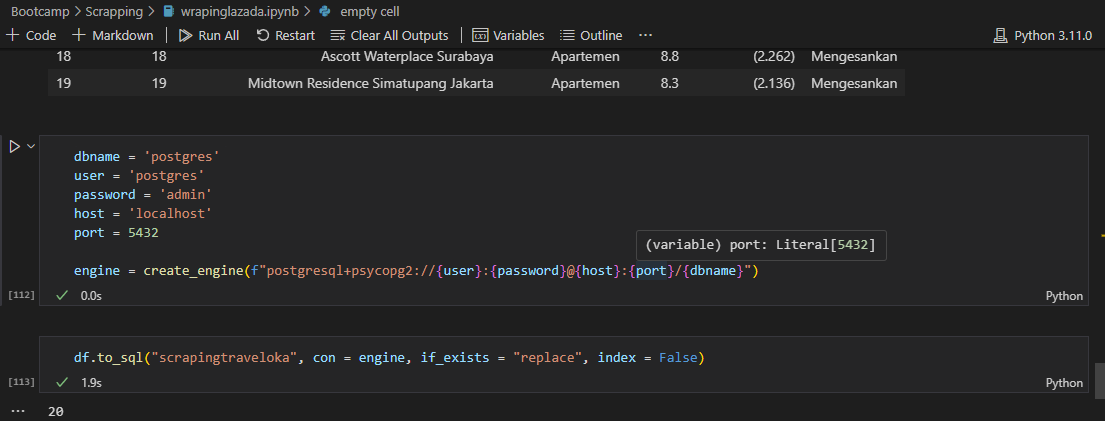

## **No 5**



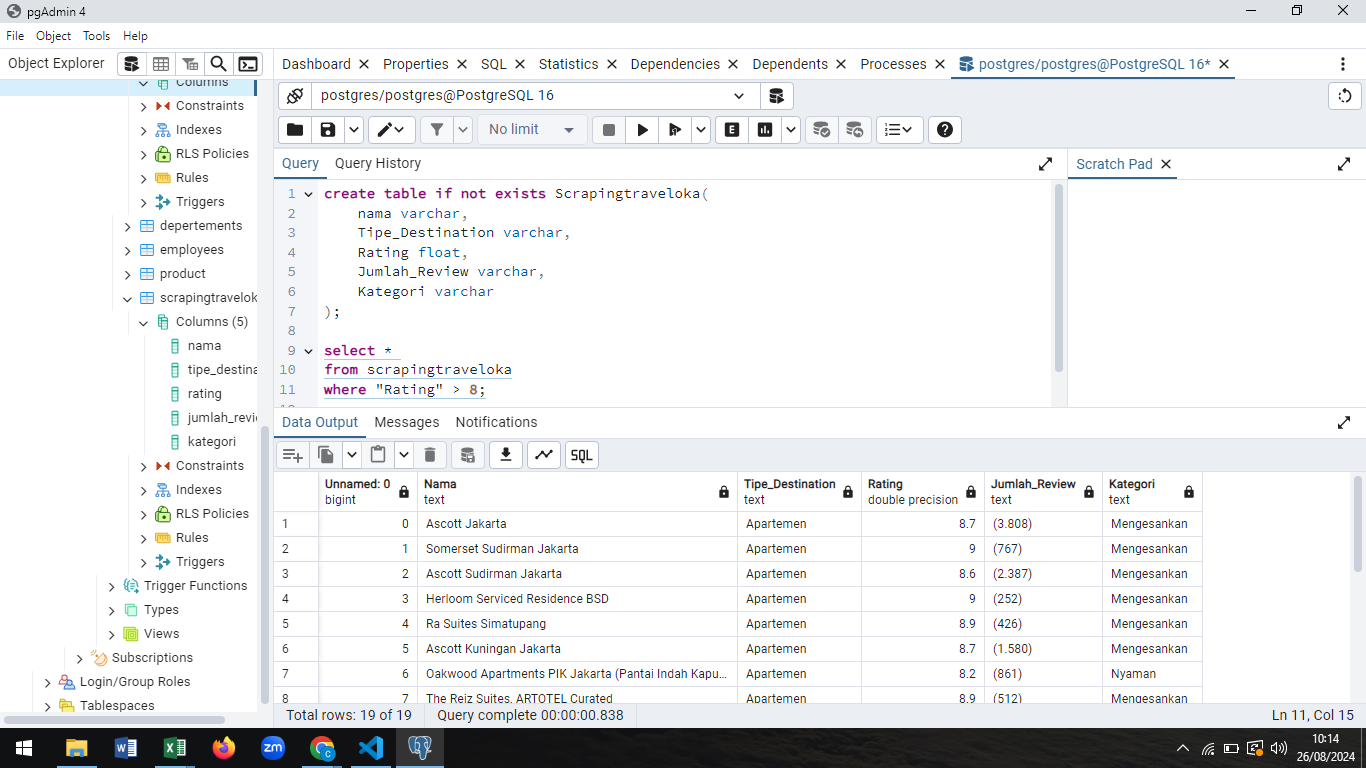


Dalam query dapat digunakan code sederhana berikut.
```
select *
from scrapingtraveloka
where "Rating" > 8;
```

Untuk Menentukan rating kategori dapat menggunakan code berikut.
```
SELECT
    "Rating",
    CASE
        WHEN "Rating" > 8 THEN 'High'
        WHEN "Rating" BETWEEN 5 AND 8 THEN 'Medium'
        ELSE 'Low'
    END AS rating_category
FROM
    scrapingtraveloka;

```


**Berdasarkan Hasil Web Scraping ini dapat disimpulkan bahwa dalam data ini memiliki beberapa analisis yang perlu diperhatikan**
1.   Dapat Menentukan Nama Destinasi berdasarkan kategori tertentu
2.   Dapat Menentukan Nama Destinasi berdasarkan rating tertentu
3.   Dapat Menentukan Nama Destinasi berdasarkan jumlah review tertentu dll.


Sehingga pelanggan atau user akan mempermudah penggunaan berdasarkan kemauan akan menentukan destinasi mana yang sesuai dengan kriteria tersebut